<img src="images/quantum_algorithms_tutorials.png" alt="drawing" width="100" align="left"/>

<h2 align="center">
Quantum parallelism and Deutsch–Jozsa algorithm
</h2>

<h3 align="left">
Quantum parallelism
</h3>

In this tutorial, we are going to introduce 3 separate problems and we will mainly follow the [[1](https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB)] book's approach of describing them. So, let's start with quantum parallelism, which is one of the powerful tools/properties of the quantum computer. It arises from the possibility of creating the superposition states. Quantum parallelism enables us to simultaneously compute the outputs of a function for given different inputs. Let's say we have two registers one for input the other for output. The initial state is given by $\left| x \right\rangle \left| y \right\rangle$ wavefunction, where $\left| x \right\rangle$ is the register that takes $x$ input and $\left| 0 \right\rangle$ is the output register where the value of the $f(x)$ function will be stored. After applying the circuit that corresponds to the given function the wavefunction becomes $\left| x \right\rangle \left| f(x) \; mod \; 2 \right\rangle$ (see [[modular arithmetic](https://en.wikipedia.org/wiki/Modular_arithmetic)]). Here is the circuit:

<img src="images/qparallel.png" alt="drawing" width="300"/>

The$ U_{f(x)}$ is the unitary operator that acts on both  registers and corresponds to the given $f(x)$ function. Let's see what happens when instead of one $\left| x \right\rangle$ bit string, we have a superposition state of all possible bit strings:

$$\frac{1}{2}\sum_{x} \left| x \right\rangle = \frac{1}{2} \left[ \left| 00 \right\rangle + \left| 01 \right\rangle + \left| 10 \right\rangle + \left| 11 \right\rangle \right]$$

The coefficient in front of the state is for normalization (sum of all bit string probabilities in the superposition state must be unity). This superposition state will let us witness the quantum parallelism in action. Now let's write down the combined state of two registers:

$$\left| \psi_{initial} \right\rangle = \frac{1}{2} \left| 0 \right\rangle \sum_{x} = \frac{1}{2}  \left[ \left| 0 \right\rangle \left| 00 \right\rangle + \left| 0 \right\rangle \left| 01 \right\rangle + \left| 0 \right\rangle \left| 10 \right\rangle + \left| 0 \right\rangle \left| 11 \right\rangle \right]$$

After $U_{f(x)}$ unitary operator the state will look like this:

$$\left| \psi_{final} \right\rangle = \frac{1}{2}  \left[ \left| f(00) \right\rangle \left| 00 \right\rangle + \left| f(01) \right\rangle \left| 01 \right\rangle + \left| f(10) \right\rangle \left| 10 \right\rangle + \left| f(11) \right\rangle \left| 11 \right\rangle \right]$$

We are already there. So, we have applied one $U_{f(x)}$ unitary operator, but, in fact, the $f(x)$ function was evaluated 4 times for each term from the superposition state. This effect is called quantum parallelism, and this quantum computing "tool" is widely used in lots of quantum algorithms. Let see how it works for some specific function. Suppose we have a function that for those $x$s that have even number of $1$ bit the $f(x) = 0$ and when the number of $1$s is odd the $f(x) = 1$. To make things more interesting we will use $3$ qubits for the input register. Here is the circuit:

<img src="images/qparallel_example.png" alt="drawing" width="400"/>

where $i$ indices denote the input qubits and $o$ denotes the output qubit. Here the first 3 Hadamard gates are for preparing a $3$ qubit superposition state. The CNOT gates represent our given function $f(x)$ that has an output $0$ if there are even number of $1$s in the input register and $1$ otherwise. Now let's go step by step and see how the quantum state changes. The initial $\left| \psi_{0} \right\rangle$ quantum state:

$$\left| \psi_{0} \right\rangle = \left| 0 \right\rangle_o \left| 000 \right\rangle_i$$

After 3 Hadamard gates the $\left| \psi_{1} \right\rangle$ quantum state looks like this (omitting the qubit indices):

$$\left| \psi_{1} \right\rangle = \frac{1}{\sqrt{2^3}}\left| 0 \right\rangle \left[ \left| 000 \right\rangle + \left| 001 \right\rangle + \left| 010 \right\rangle + \left| 011 \right\rangle + \left| 100 \right\rangle + \left| 101 \right\rangle + \left| 110 \right\rangle + \left| 111 \right\rangle \right]$$

Or in more compact form:

$$\left| \psi_{1} \right\rangle = \frac{1}{\sqrt{2^3}}\left| 0 \right\rangle \sum_x \left| x \right\rangle,$$

where $x$ changes from $000$ to $111$. Here is the Hadamard gate and its actions on $\left| 0 \right\rangle$ and $\left| 1 \right\rangle$ states: 

\begin{align*}
&H \left| 0 \right\rangle = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
1 \\
0 
\end{pmatrix} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
1
\end{pmatrix} = 
\frac{1}{\sqrt{2}} \left( \left| 0 \right\rangle + \left| 1 \right\rangle \right) 
\\
&H \left| 0 \right\rangle = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix} 
\begin{pmatrix}
0 \\
1 
\end{pmatrix} = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 \\
-1
\end{pmatrix} = 
\frac{1}{\sqrt{2}} \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right) 
\end{align*}

If one applies Hadamard gates on $n$ qubits in the $\left| 0 \right\rangle$ initial state, it creates the $\frac{1}{\sqrt{2^n}}\sum_x \left| x \right\rangle$ superposition state with equal probabilities for each bit string. Here $x$ changes from $00...0$ to $11...1$.

After CNOT gates that implements the $f(x)$ function the quantum state $\left| \psi_2 \right\rangle$ will become:

$$\left| \psi_2 \right\rangle = \frac{1}{\sqrt{2^3}} \sum_x \left| f(x) \right\rangle  \left| x \right\rangle$$

Or in a more explicit form:

$$\left| \psi_2 \right\rangle = \frac{1}{\sqrt{2^3}} \left[ \left| 0 \right\rangle \left| 000 \right\rangle + \left| 1 \right\rangle \left| 001 \right\rangle + \left| 1 \right\rangle \left| 010 \right\rangle + \left| 0 \right\rangle \left| 011 \right\rangle + \left| 1 \right\rangle \left| 100 \right\rangle + \left| 0 \right\rangle \left| 101 \right\rangle + \left| 0 \right\rangle \left| 110 \right\rangle + \left| 1 \right\rangle \left| 111 \right\rangle \right],$$

where we used the definition of the given $f(x)$ function. To check this calculation one should know the action of CNOT gate on an arbitrary two-qubit state $a \left| 00 \right\rangle + b \left| 01 \right\rangle + c \left| 10 \right\rangle + d \left| 11 \right\rangle$, where $a$, $b$, $c$ and $d$ are some arbitrary complex numbers that satisfy $\left| a \right|^2 + \left| b \right|^2 + \left| c \right|^2 + \left| d \right|^2 = 1$ (normalization). After acting CNOT gate, that is controlled from the first qubit, we will obtain the following state $\left| 00 \right\rangle + b \left| 01 \right\rangle + c \left| 11 \right\rangle + d \left| 10 \right\rangle$, where we just changed the second qubit's bit when the first qubit was in $\left|1\right\rangle$ state.

Now let's write a code for this circuit:

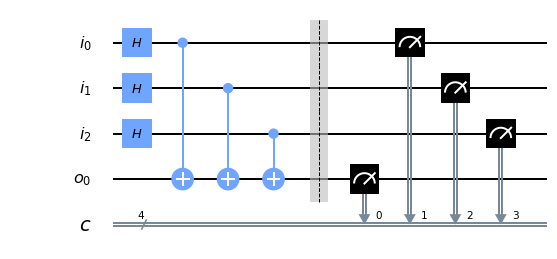

In [1]:
from qiskit import *

# Initialization of registers where we store the qubits and classical bits 
# and the quantum circuit acting on those registers
input_register = QuantumRegister(3, "i")
output_register = QuantumRegister(1, "o")
classical_register = ClassicalRegister(4, "c")
parallelism_circuit = QuantumCircuit(input_register, output_register, classical_register)

# Hadamard gates acting on qubits in the input_register
parallelism_circuit.h(input_register[0])
parallelism_circuit.h(input_register[1])
parallelism_circuit.h(input_register[2])

# CNOTs controlled by qubits from the input_register 
# and applied on the qubit from the output register
parallelism_circuit.cx(input_register[0], output_register[0])
parallelism_circuit.cx(input_register[1], output_register[0])
parallelism_circuit.cx(input_register[2], output_register[0])

# Just for a nice drawing of the circuit, add a barrier 
# to separate measurements and gates in the picture
parallelism_circuit.barrier()

# Measurements on the qubits from the output_register and input_register
# the results are stored in the classical bits from classical_register
parallelism_circuit.measure(output_register[0], classical_register[0])
parallelism_circuit.measure(input_register[0], classical_register[1])
parallelism_circuit.measure(input_register[1], classical_register[2])
parallelism_circuit.measure(input_register[2], classical_register[3])

# Let's draw the circuit 
%matplotlib inline
parallelism_circuit.draw(output="mpl")

Now we will run this circuit on a quantum computer simulator and plot the results in the histogram.

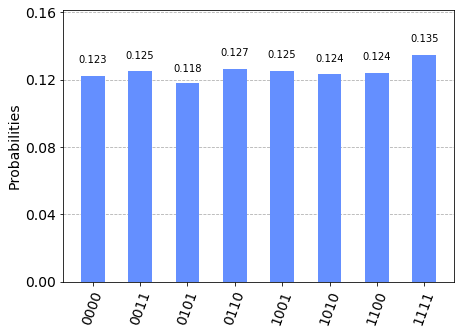

In [2]:
from qiskit.visualization import plot_histogram

# The quantum computer simulator that we will use
simulator = BasicAer.get_backend('qasm_simulator')

# The execution of the circuit with a given number  
# of shots (number of execution) for statistics
job = execute(parallelism_circuit, simulator, shots=8096)
result = job.result()
counts = result.get_counts()

# The plot of the results in the histogram
plot_histogram(counts)

Note that the first bit in the histogram is the qubit from the output register and the rest bits are from the input register. One can notice that the output register is $0$ when we have an even number of $1$s in the input register and, otherwise, the output register is $1$. Also, the probability of the outcome of one of the states are equal to each other and equal to $\approx 0.125 = \left|\frac{1}{\sqrt{2^3}}\right|^2$, as was predicted in the formulas describing the superposition state. This procedure of the measurements is not the best thing that we can do with quantum parallelism. Sometimes we will need more sophisticated measurements (quantum state tomography) to understand the action of the circuit, which may consume a lot of execution time. So we should use quantum parallelism more wisely in order to not lose the speedup that it can provide. One of the approaches is to obtain information about general property of the $f(x)$ function. This approach will be discussed in the next paragraphs.

<h3 align="left">
Deutsch's algorithm
</h3>

In the Deutsch algorithm we are solving a problem by using only two qubits. The problem more intuitevly can be discribed this way [[1](https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB)]: Alice and Bob (after Peter Shor the most famous two names used in qauntum computing (c) Ike Chuang) live in different cities and they are playing a "funny" game. Alice prepares her qubits and sends them to Bob. Bob applies a function on Alice's qubits and sends back the qubits to Alice. Bob is restricted to use one of the 4 possible functions, that are either constant ($f(0) = f(1)$) or balanced ($f(0) \ne f(1)$), and input and output of the function is one bit ($0$ or $1$). Alice with one measurement deduces is the Bob's used function balanced or constant. In the course of this algorithm we will use the concept of quantum parallelism and show its power in action. Here is the circuit for the algorithm:

<img src="images/Deutsch.png" alt="drawing" width="500"/>

where $\left| x \right\rangle$ is the input register with one qubit, $\left| y \right\rangle$ is the output register also with one qubit, $M$ is the measurement. The initial state is $\left| \psi_0 \right\rangle = \left| 0 \right\rangle \left| 1 \right\rangle$. Alice applies Hadamard gates on both input and output registers and obtains the $\left| \psi_1 \right\rangle$ state:

$$
\left| \psi_1 \right\rangle = \frac{1}{2} 
\left( \left| 0 \right\rangle + \left| 1 \right\rangle \right)
\left( \left| 0 \right\rangle - \left| 1 \right\rangle \right).
$$

Then Alice sends the qubits prepared in the $\left| \psi_1 \right\rangle$ state to Bob. Now the decision should be made from Bob, what $f(x)$ function to use. There are 4 possible function that Bob can use. Two of them are constant functions ($f(0) = f(1) = 0$ or $f(0) = f(1) = 1$) and other two are balanced ($f(0) = 0$ and $f(1) = 1$ or $f(0) = 1$ and $f(1) = 0$). After choosing one of them Bob acts the corresponding circuit on the qubits and the obtained information is stored in the output register by mod 2 sum $\left| y \oplus f(x)\right\rangle$. Let's rewrite the $\left| \psi_1 \right\rangle$ in this way:

$$
\left| \psi_1 \right\rangle = \frac{1}{2} 
\left( \left| 0 \right\rangle + \left| 1 \right\rangle \right)
\left( \left| 0 \right\rangle - \left| 1 \right\rangle \right) = 
\frac{1}{2} 
\left( \left| 0 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right) + \left| 1 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right) \right)
$$

After applying circuit for $f(x)$ function one will obtain $\left| \psi_2 \right\rangle$ state that Bob will send back to Alice:

$$
\left| \psi_2 \right\rangle = \frac{1}{2} 
\left( \left| 0 \right\rangle \left( \left| 0 \oplus f(0) \right\rangle - \left| 1 \oplus f(0) \right\rangle \right) + \left| 1 \right\rangle \left( \left| 0 \oplus f(1) \right\rangle - \left| 1 \oplus f(1) \right\rangle \right) \right)
$$

As you can see the $f(0)$ and $f(1)$ was calculated in the same time by only one action/circuit, but they are stored in the different superpositional states. This is, in fact, beacuse of the quantum parallelism as discribed in the previous parapgraph. Now Bob sends the qubits back and Alice want to deduce is the Bob's used function balanced or constant. Alice applies Hadamard gate on the input qubit and obtains the final $\left| \psi_3 \right\rangle$ quantum state before meausurement:

$$
\left| \psi_3 \right\rangle = \frac{1}{\sqrt{2^3}} 
\left( \left( \left| 0 \right\rangle + \left| 1 \right\rangle \right) \left( \left| 0 \oplus f(0) \right\rangle - \left| 1 \oplus f(0) \right\rangle \right) + \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right) \left( \left| 0 \oplus f(1) \right\rangle - \left| 1 \oplus f(1) \right\rangle \right) \right)
$$

Let's groub all superposition states depending on the state of the qubit in the input register.

\begin{align}
\left| \psi_3 \right\rangle = \frac{1}{\sqrt{2^3}} 
\big( 
& 
\left| 0 \right\rangle \left( \left| 0 \oplus f(0) \right\rangle - \left| 1 \oplus f(0) \right\rangle  + \left| 0 \oplus f(1) \right\rangle - \left| 1 \oplus f(1) \right\rangle \right) + 
\\
& 
\left| 1 \right\rangle \left( \left| 0 \oplus f(0) \right\rangle - \left| 1 \oplus f(0) \right\rangle - \left| 0 \oplus f(1) \right\rangle +  \left| 1 \oplus f(1) \right\rangle \right) 
\big)
\end{align}

We are already there. Now we are going to show that, when we have balanced function the terms in the first bracket cancel each other and final state of the first qubit becomes $\left| 1 \right\rangle$. And we have constant function the terms of the second braket cancel each other and the final state of the first qubit becomes $\left| 1 \right\rangle$. So, just by measuring the firs qubit Alice can deduce is the function that Bob has used is whether balanced or constant. To see this let's talk about one of the examples. Suppose Bob have choosen a balanced function for which $f(0) = 0$ and $f(1) = 1$. In that case:

\begin{align*}
\left| \psi_3 \right\rangle = \frac{1}{\sqrt{2^3}} 
\big( 
& 
\left| 0 \right\rangle \left( \left| 0 \oplus 0 \right\rangle - \left| 1 \oplus 0 \right\rangle  + \left| 0 \oplus 1 \right\rangle - \left| 1 \oplus 1 \right\rangle \right) + 
\\
& 
\left| 1 \right\rangle \left( \left| 0 \oplus 0 \right\rangle - \left| 1 \oplus 0 \right\rangle - \left| 0 \oplus 1 \right\rangle +  \left| 1 \oplus 1 \right\rangle \right) 
\big)
\end{align*}

Note that $1 \oplus 1 = 0$. $0 \oplus 1 = 1$, $1 \oplus 0 = 1$ and $0 \oplus 0 = 0$ . So:

\begin{align*}
\left| \psi_3 \right\rangle = \frac{1}{\sqrt{2^3}} 
\big( 
& 
\left| 0 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle  + \left| 1 \right\rangle - \left| 0 \right\rangle \right) + 
\\
& 
\left| 1 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle - \left| 1 \right\rangle +  \left| 0 \right\rangle \right) 
\big) =
\\
& = \frac{1}{\sqrt{2}}\left| 1 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
\end{align*}

The same thing can be shown for other possible functions and deduce is the function balanced or not:

\begin{align*}
&\text{f(0) = 0, f(1) = 0:} \;\; \left| \psi_3 \right\rangle = \frac{1}{\sqrt{2}}\left| 0 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
\\
&\text{f(0) = 1, f(1) = 1:} \;\; \left| \psi_3 \right\rangle = -\frac{1}{\sqrt{2}}\left| 0 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
\\
&\text{f(0) = 0, f(1) = 1:} \;\; \left| \psi_3 \right\rangle = \frac{1}{\sqrt{2}}\left| 1 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
\\
&\text{f(0) = 1, f(1) = 0:} \;\; \left| \psi_3 \right\rangle = -\frac{1}{\sqrt{2}}\left| 1 \right\rangle \left( \left| 0 \right\rangle - \left| 1 \right\rangle \right)
\end{align*}

One can see that if the function is constant (the first two cases) the qubit in the input register is in the $\left| 0 \right\rangle$ state and if the function is balanced (the last two cases) the qubit is in the $\left| 1 \right\rangle$ state. Here we encouther to one more nice property of quantum computation called quantum interference. It arises from the fact that probability amplitude are coplex numbers and can be substructed from each other (like we did: destructive interference $ \left| 0 \right\rangle -  \left| 0 \right\rangle = (1 - 1) \left| 0 \right\rangle = 0$; constructive interference $ \left| 0 \right\rangle +  \left| 0 \right\rangle = (1 + 1) \left| 0 \right\rangle = 2 \left| 0 \right\rangle$). Alongside with quantum parallelism the quantum interference both are one of the main properties/tools that makes quantum computation so powerful.

Now we are ready to code. In the code we will implement all 4 possible functions and let Bob to choose what he likes (actually we will choose one of the circuits randomly in order to simulate free will of the imaginery person Bob XD). But, before that Alice should prepare the qubits:

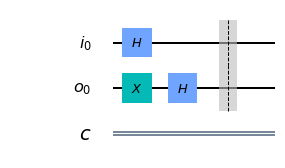

In [3]:
# Alice qubit preparation
input_register = QuantumRegister(1, "i")
output_register = QuantumRegister(1, "o")
classical_register = ClassicalRegister(1, "c")

circuit_Deutsch = QuantumCircuit(input_register, output_register, classical_register)

# prepare the qubit in the output register in the |1> state
circuit_Deutsch.x(output_register[0])

# Hadamard gates on both input and ouput registers
circuit_Deutsch.h(input_register[0])
circuit_Deutsch.h(output_register[0])

# add an barrier
circuit_Deutsch.barrier()

# draw the circuit 
%matplotlib inline
circuit_Deutsch.draw(output="mpl")

Now Alice sends to Bob the qubits and Bob should choose one of the four functions (circuits) [[2](https://quantumcomputing.stackexchange.com/questions/9566/implementing-four-oracles-for-the-deutsch-algorithm-preferably-on-ibm-q-experie)] to apply on the qubits.

In [4]:
# Bob's four otional function/circuits

# the first option: constant f(0) = f(1) = 0
circuit_Bob1 = QuantumCircuit(input_register, output_register)
circuit_Bob1.barrier()

# the second option: constant f(0) = f(1) = 1
circuit_Bob2 = QuantumCircuit(input_register, output_register)
circuit_Bob2.cx(input_register[0], output_register)
circuit_Bob2.x(input_register[0])
circuit_Bob2.cx(input_register[0], output_register)
circuit_Bob2.x(input_register[0])
circuit_Bob2.barrier()

# the third option: balaced f(0) = 0 & f(1) = 1
circuit_Bob3 = QuantumCircuit(input_register, output_register)
circuit_Bob3.cx(input_register[0], output_register)
circuit_Bob3.barrier()

# the fourth option: balaced f(0) = 1 & f(1) = 0
circuit_Bob4 = QuantumCircuit(input_register, output_register)
circuit_Bob4.x(input_register[0])
circuit_Bob4.cx(input_register[0], output_register)
circuit_Bob4.x(input_register[0])
circuit_Bob4.barrier()

Now Bob will choose randomly what circuit to implement. Note that for Alice the applied circuit will be unknown: for her it is blackbox.

The circuit with Bob's choosen function


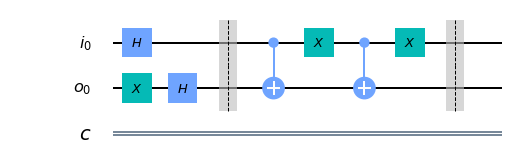

In [5]:
import random
list_options_Bob = [circuit_Bob1, circuit_Bob2, circuit_Bob3, circuit_Bob4]
circuit_Bob_choice = random.choice(list_options_Bob)

# add the choosen circuit to the original circuit
circuit_Deutsch += circuit_Bob_choice

# draw the circuit 
print("The circuit with Bob's choosen function")
%matplotlib inline
circuit_Deutsch.draw(output="mpl")

After applying the choosen function/circuit, Bob sends back the qubits to Alice. 

The final version of the circuit


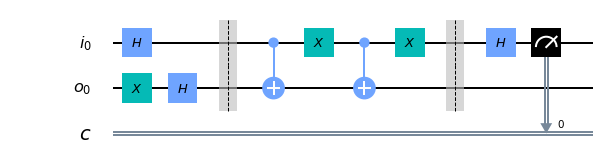

In [6]:
# Alice's final operations
circuit_Deutsch.h(input_register[0])
circuit_Deutsch.measure(input_register[0], classical_register[0])

# draw the final version of the circuit 
print("The final version of the circuit")
%matplotlib inline
circuit_Deutsch.draw(output="mpl")

In [7]:
# The execution of the circuit
counts = execute(circuit_Deutsch, simulator, shots=1024).result().get_counts()

# take the most often obtaned result
measurement_result = max(counts, key=counts.get)
print("The results of the measurements: {}".format(counts))
print("The final result is: {}".format(measurement_result))

# from the finla measurement result Alice deduces
# is the choosen/applyied function balanced or constant
if measurement_result == '0':
    print("Bob's used function was constant")
elif measurement_result == '1':
    print("Bob's used function was balanced")

The results of the measurements: {'0': 1024}
The final result is: 0
Bob's used function was constant


Note that if Alice and Bob will choose to play their "game" not with quantum computer, but with classical computer, Alice will need to send two different set of bits to figure out is the Bob's function balanced or not. With quantum computer as we already have seen one sending of qubits is enough. This seems not a big deal, but suppose that the cost of sending and bringing back the bits/qubits from Alice to Bob's location is $\text{1m} \; \$$ dollars [[3](https://www.youtube.com/watch?v=awpnsGl08bc&list=LLEPoMdv-DZViRaaObznY_-A&index=113&t=0s)]. If they are using quantum computer they will spent only $\text{1m} \; \$$ dollars, and if they use classical computer they will spent $\text{2m} \; \$ $. In this sense the quantum computer is much better then the classical one for playing this "game". So, the Deutsch algorithm is a toy model algorithm, which shows us the possble advantages of using quantum computers and the demonstration of its power comes from two main sources: quntum parallelism and quantum interference.

<h3 align="left">
The Deutsch-Jozsa algorithm
</h3>

Deutsch-Jozsa algorithm is a modification of the Deutsch algorithm. In this modification in the input register we have $n$ qubits instead of one. The functions now take $n$ bit strings (e.g. "0101011") as an argument and returs one bit outcome (still the outcome is $0$ or $1$ and is stored in the output register). Bob still is restricted to use either balanced or constant function and Alice should deduce with only one measurement the property of that function. Bob has two options for constant function (for all imputs the $f(x) = 0$ or $f(x) = 1$) and $\begin{pmatrix} n \\ \frac{n}{2} \end{pmatrix} = \frac{n!}{(\frac{n}{2}!)^2}$ options to choose a balanced function. THe main steps of the algorihtm is presented in the following circuit:

<img src="images/Deutsch_Jozsa.png" alt="drawing" width="600"/>

where $\left| 0 \right\rangle^{\otimes n}$, means that we have n qubits in the input register, $H^{\otimes n}$ means applying $n$ Hadamard gates on each qubit in that register, $M^{\otimes n}$ is $n$ measurements executed on $n$ (all) qubits. As you can see we the circuit is very similar to the circuit from Deutsch algorithm. Now we will go trow the steps of the Deutsch-Jozsa algorithm. After $n$ Hadamard gates applyed on the imput register and one Hadamard gate applyed on the output register we will have [[1](https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB)]:

$$
\left| \psi_1 \right\rangle = \frac{1}{\sqrt{2^n}} \sum_{x} \left| x \right\rangle  
\frac{\left| 0 \right\rangle - \left| 1 \right\rangle}{\sqrt{2}}
$$

where sum is over all possible $x$ bit stings. Then Bob applys some $f(x)$ function and obtains the $\left| \psi_2 \right\rangle$ state:

$$
\left| \psi_2 \right\rangle = \frac{1}{\sqrt{2^n}} \sum_{x} \left| x \right\rangle  
\frac{\left| 0 \oplus f(x) \right\rangle - \left| 1 \oplus f(x) \right\rangle}{\sqrt{2}}
$$

Note that $f(x)$ is either $0$ or $1$ for given $x$, so:

\begin{align*}
&\text{if $f(x) = 0$}\;\;\;  (+1)\left| x \right\rangle  
\frac{\left| 0 \right\rangle - \left| 1 \right\rangle}{\sqrt{2}}
\\
&\text{if $f(x) = 1$}\;\;\;  (-1)\left| x \right\rangle  
\frac{\left| 0 \right\rangle - \left| 1 \right\rangle}{\sqrt{2}}
\end{align*}

By taking into accout the expressions written above the $\left| \psi_2 \right\rangle$ state will take the following form:

$$
\left| \psi_2 \right\rangle = \frac{1}{\sqrt{2^n}} \sum_{x} (-1)^{f(x)}\left| x \right\rangle  
\frac{\left| 0 \right\rangle - \left| 1 \right\rangle}{\sqrt{2}} = 
\frac{1}{\sqrt{2^n}} \sum_{x} (-1)^{f(x)}\left| x \right\rangle  
\left| - \right\rangle
$$

Now the qubits are back to Alice and she applies Hadamard gates on the input register. First of all let's see what happens when we apply Hadamard gates on some $\left|  x \right\rangle = \left| x_1 x_2 ... x_n \right\rangle$ state, where $x_i$s are the bits from the $x$ bit srtring. For example, let's see what happens with $\left|x \right\rangle = \left|011 \right\rangle$ state

$$
H^{\otimes 3}\left|x \right\rangle =  H^{\otimes 3} \left|011 \right\rangle = \left| +-- \right\rangle = \frac{1}{\sqrt{2^3}}
\sum_z (-1)^{x_1 z_1 + x_2 z_2 + x_3 z_3} \left| z \right\rangle = \frac{1}{\sqrt{2^3}}
\sum_z (-1)^{x \cdot z} \left| z \right\rangle 
$$

where $x \cdot z$ is the bitwise inner product of $x$ and $z$. Because when we have $\left|... x_m = 1_m ... \right\rangle$ bitstring, after Hadamards the state will look like $\left|... -_m ... \right\rangle = \frac{1}{\sqrt{2}}\left(\left|... z_m = 0_m ... \right\rangle - \left|... z_m = 1_m ... \right\rangle \right)$. The minus sign in the final state $\left| z \right\rangle$ bitstring that "comes" from $m$th bit only if $x_m = 1$ and $z_m = 1$. So, the $m$th bit's contribution is the $(-1)^{x_m \cdot z_m}$ product term. This can be generalise for $n$ qubits. The state $\left| \psi_3\right\rangle$, after Alice performing $H^{\otimes n}$ gates:

\begin{align*}
\left| \psi_3 \right\rangle &= H^{\otimes n}
\frac{1}{\sqrt{2^n}} \sum_{x} (-1)^{f(x)}\left| x \right\rangle  
\left| - \right\rangle = 
\left| \psi_3 \right\rangle = 
\frac{1}{\sqrt{2^n}} \sum_{x} (-1)^{f(x)} H^{\otimes n} \left| x \right\rangle  
\left| - \right\rangle = \\
&= \frac{1}{2^n} \sum_x \sum_z (-1)^{x \cdot z + f(x)} \left| z \right\rangle \left| - \right\rangle 
\end{align*}

Now let's find the aplitude of spicific one entry in this sum: namely the amplitude that corresponds to $\left|z\right\rangle = \left| 00...0 \right\rangle = \left| 0^{\otimes n} \right\rangle$

$$
\frac{1}{2^n} \sum_x (-1)^{x \cdot 0^{\otimes n} + f(x)} \left| 0 \right\rangle \left| - \right\rangle = \frac{1}{2^n} \sum_x (-1)^{f(x)} \left| 0 \right\rangle \left| - \right\rangle
$$

So, the amplitude is $\frac{1}{2^n} \sum_x (-1)^{f(x)}$ and if the $f(x)$ is a balanced funtion the sum of the amlitudes will be equal to $0$ (destructive interference) and Alice will never measure $\left| 0^{\otimes n} \right\rangle$ outcome in the input register. In contrast if the $f(x)$ is a constant function the sum of the amlitudes will be equal to $\pm 1$ (constructive interference) and Alice will always measure $\left| 0^{\otimes n} \right\rangle$ outcome. That is why, by final measurements Alice will know was Bob's function balanced or constant. Classical deterministic approuch for this problem will requir to send bits back and forth
$2^{n-1} + 1$ times in the worst case scenario. Thus Alice and Bob are happy with their quantum computers.

In the implementation we will restrict Bib to use only two functionse: one is constant $f(x) = 1$, by just applying $x$ gate on the output qubit, and the second is the function that we have used in the quantum parallelism chapter that is actually an example of balanced function. Also, the example will be for 4 qubits: 

In [8]:
# Alice qubit preparation
input_register = QuantumRegister(3, "i")
output_register = QuantumRegister(1, "o")
classical_register = ClassicalRegister(3, "c")

circuit_Deutsch_Jozsa = QuantumCircuit(input_register, output_register, classical_register)

# prepare the qubit in the output register in the |1> state
circuit_Deutsch_Jozsa.x(output_register[0])

# Hadamard gates on both input and ouput registers
circuit_Deutsch_Jozsa.h(input_register) # Hadamard gate is applied to all qubits in the input_register
circuit_Deutsch_Jozsa.h(output_register[0])

# add an barrier
circuit_Deutsch_Jozsa.barrier()

Alice sends the qubits to Bob. Bob apply $f(x) = 1$ constant function and sends back the qubits to Alice. Alice measures the qubits in the input register and deduces that Bob has used constant function:

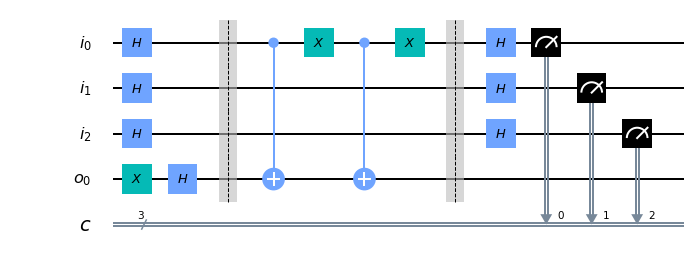

In [9]:
# Circuit for the constant case
circtuit_Deutsch_Jozsa_constant  = QuantumCircuit(input_register, output_register, classical_register)
circtuit_Deutsch_Jozsa_constant += circuit_Deutsch_Jozsa

# implementing f(x) = 1 constant function
circtuit_Deutsch_Jozsa_constant.cx(input_register[0], output_register[0])
circtuit_Deutsch_Jozsa_constant.x(input_register[0])
circtuit_Deutsch_Jozsa_constant.cx(input_register[0], output_register[0])
circtuit_Deutsch_Jozsa_constant.x(input_register[0])

# add an barrier
circtuit_Deutsch_Jozsa_constant.barrier()

# final Hadamard gates applyed on all qubits in the input_register
circtuit_Deutsch_Jozsa_constant.h(input_register)


# measurments executed for all qubits in the input_register
circtuit_Deutsch_Jozsa_constant.measure(input_register, classical_register)

# draw the circuit 
%matplotlib inline
circtuit_Deutsch_Jozsa_constant.draw(output="mpl")

In [10]:
# The execution of the circuit
counts = execute(circtuit_Deutsch_Jozsa_constant, simulator, shots=1024).result().get_counts()

# Alice checks if Bob's function was constant or balanced
if '000' in counts:
    print("Bob's used function was constant")
elif measurement_result == '1':
    print("Bob's used function was balanced")

Bob's used function was constant


Now we will do the same calculations, but for balanced $f(x)$ function that we have used in the quantum parallelism paragraph.

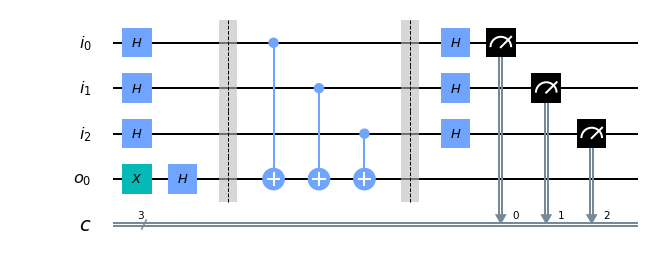

In [11]:
# Circuit for the constant case
circtuit_Deutsch_Jozsa_balanced  = QuantumCircuit(input_register, output_register, classical_register)
circtuit_Deutsch_Jozsa_balanced += circuit_Deutsch_Jozsa

# implementing f(x) = 1 constant function
circtuit_Deutsch_Jozsa_balanced.cx(input_register[0], output_register[0])
circtuit_Deutsch_Jozsa_balanced.cx(input_register[1], output_register[0])
circtuit_Deutsch_Jozsa_balanced.cx(input_register[2], output_register[0])

# add an barrier
circtuit_Deutsch_Jozsa_balanced.barrier()

# final Hadamard gates applyed on all qubits in the input_register
circtuit_Deutsch_Jozsa_balanced.h(input_register)


# measurments executed for all qubits in the input_register
circtuit_Deutsch_Jozsa_balanced.measure(input_register, classical_register)

# draw the circuit 
%matplotlib inline
circtuit_Deutsch_Jozsa_balanced.draw(output="mpl")

In [12]:
# The execution of the circuit
counts = execute(circtuit_Deutsch_Jozsa_balanced, simulator, shots=1024).result().get_counts()

# Alice checks if Bob's function was constant or balanced
if '000' in counts:
    print("Bob's used function was constant")
elif measurement_result == '1':
    print("Bob's used function was balanced")

[1] [M.A. Nielsen, I.L. Chuang, Cambridge University Press New York, "Quantum Computation and Quantum Information: 10th Anniversary Edition
10th" (2011)](https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB)

[2] [A question about implementing four oracles for the Deutsch algorithm in the Quantum Computing Stack Exchange](https://quantumcomputing.stackexchange.com/questions/9566/implementing-four-oracles-for-the-deutsch-algorithm-preferably-on-ibm-q-experie)

[3] [Video lecture "24. Entanglement — QComputing, EPR, and Bell" by Allan Adams: starting from 50:20 the Deutsch algorithm](https://www.youtube.com/watch?v=awpnsGl08bc&list=LLEPoMdv-DZViRaaObznY_-A&index=113&t=0s)